In [5]:
import pandas as pd
df = pd.read_csv("../data/raw/superstore.csv", encoding="ISO-8859-1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [9]:
df.drop_duplicates(inplace=True)


In [10]:
for col in ['Sales', 'Profit']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]


In [11]:
df.isnull().sum()
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,5010.666261,55878.335227,62.314599,3.464962,0.148635,9.636050
std,2883.273599,32114.558905,82.271335,2.041211,0.199668,13.843595
min,1.000000,1453.000000,0.444000,1.000000,0.000000,-27.735000
25%,2528.750000,23602.000000,12.960000,2.000000,0.000000,2.133200
50%,5015.000000,60188.000000,30.560000,3.000000,0.200000,6.797800
75%,7501.500000,90032.000000,75.850000,5.000000,0.200000,16.016250
max,9993.000000,99301.000000,496.860000,14.000000,0.800000,50.584800


In [12]:
df.to_csv("../data/cleaned/superstore_cleaned.csv", index=False)


In [14]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [16]:
df.dtypes[['Order Date', 'Ship Date']]


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [17]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Quarter'] = df['Order Date'].dt.quarter


In [19]:
df.to_csv("../data/cleaned/superstore_features.csv", index=False)


In [18]:
features = ['Quantity', 'Discount', 'Year', 'Month', 'Quarter']

X = df[features]
y_reg = df['Sales']

df['High_Profit'] = (df['Profit'] > df['Profit'].median()).astype(int)
y_clf = df['High_Profit']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

_, _, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train_reg)

y_pred_reg = reg_model.predict(X_test)

import numpy as np

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test_reg, y_pred_reg)

rmse, mae


(np.float64(79.76959021853212), 52.06065163035155)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_train_clf)

y_pred_clf = clf_model.predict(X_test)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf)

accuracy, report


(0.6423258958755916,
 '              precision    recall  f1-score   support\n\n           0       0.63      0.65      0.64       729\n           1       0.65      0.63      0.64       750\n\n    accuracy                           0.64      1479\n   macro avg       0.64      0.64      0.64      1479\nweighted avg       0.64      0.64      0.64      1479\n')

In [25]:
import joblib

joblib.dump(reg_model, "../models/sales_regression.pkl")
joblib.dump(clf_model, "../models/profit_classifier.pkl")
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']

In [26]:
ts = df.groupby('Order Date')['Sales'].sum()
ts = ts.asfreq('D')        # daily frequency
ts = ts.fillna(0)


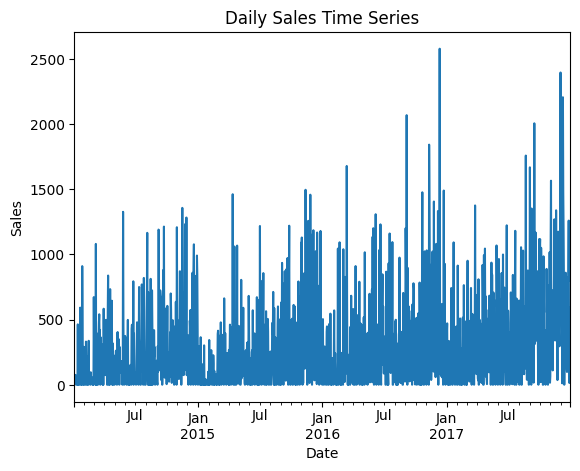

In [27]:
import matplotlib.pyplot as plt

plt.figure()
ts.plot()
plt.title("Daily Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [28]:
train_size = int(len(ts) * 0.8)
train_ts = ts[:train_size]
test_ts = ts[train_size:]


In [30]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_ts, order=(1,1,1))
model_fit = model.fit()


In [31]:
forecast = model_fit.forecast(steps=len(test_ts))


In [32]:
from sklearn.metrics import mean_absolute_error
mae_ts = mean_absolute_error(test_ts, forecast)
mae_ts


332.05868540235144

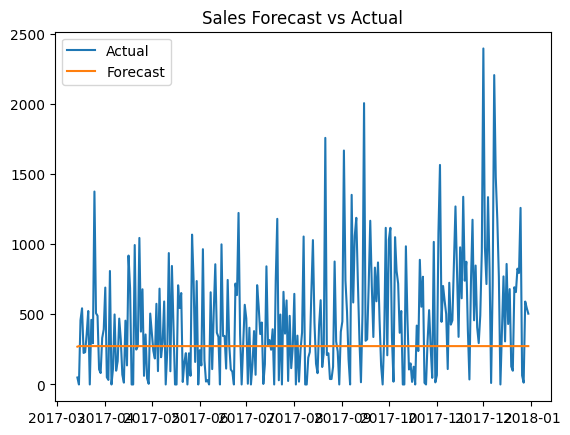

In [33]:
plt.figure()
plt.plot(test_ts.index, test_ts, label="Actual")
plt.plot(test_ts.index, forecast, label="Forecast")
plt.legend()
plt.title("Sales Forecast vs Actual")
plt.show()


In [34]:
import pandas as pd

reviews = pd.read_csv("../data/raw/reviews.csv")
reviews.head()


,review_text,rating
0,Great product and fast delivery,5
1,"Poor quality, very disappointed",1
2,"Average experience, okay product",3
3,Excellent service and quality,5
4,Late delivery and bad support,2


In [35]:
reviews['sentiment'] = reviews['rating'].apply(
    lambda x: 1 if x >= 4 else 0
)


In [36]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

reviews['clean_review'] = reviews['review_text'].apply(clean_text)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(reviews['clean_review'])
y_text = reviews['sentiment']


In [38]:
from sklearn.model_selection import train_test_split

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42
)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

nlp_model = LogisticRegression()
nlp_model.fit(X_train_t, y_train_t)

y_pred_t = nlp_model.predict(X_test_t)
accuracy_score(y_test_t, y_pred_t)


0.0

In [40]:
import joblib

joblib.dump(nlp_model, "../models/sentiment_model.pkl")
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")


['../models/tfidf_vectorizer.pkl']

In [41]:
import shap


c:\Users\HP\Desktop\AI-Powered Business Intelligence & Forecasting Platform\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
import joblib

reg_model = joblib.load("../models/sales_regression.pkl")
scaler = joblib.load("../models/scaler.pkl")


In [43]:
X_sample = X.sample(100, random_state=42)
X_sample_scaled = scaler.transform(X_sample)


In [44]:
explainer = shap.TreeExplainer(reg_model)
shap_values = explainer.shap_values(X_sample_scaled)


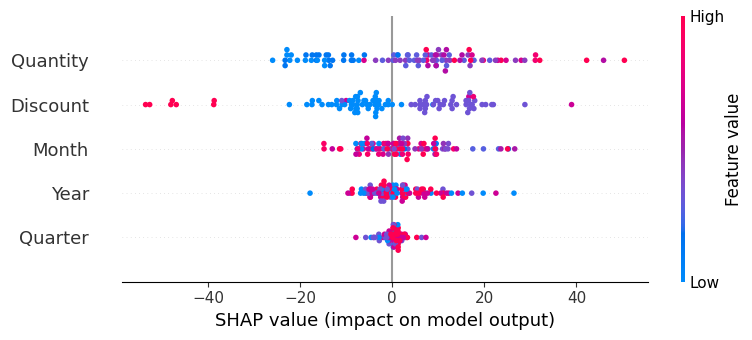

In [45]:
shap.summary_plot(shap_values, X_sample, feature_names=features)


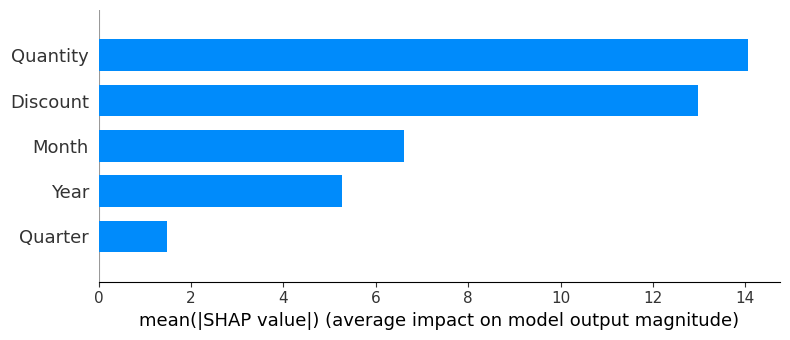

In [46]:
shap.summary_plot(shap_values, X_sample, feature_names=features, plot_type="bar")


In [47]:
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

st.set_page_config(page_title="AI Business Intelligence", layout="wide")
st.title("AI-Powered Business Intelligence & Forecasting Platform")


2026-01-24 02:06:00.343 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:00.344 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:00.542 
  command:

    streamlit run c:\Users\HP\Desktop\AI-Powered Business Intelligence & Forecasting Platform\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-24 02:06:00.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:00.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [48]:
reg_model = joblib.load("../models/sales_regression.pkl")
clf_model = joblib.load("../models/profit_classifier.pkl")
scaler = joblib.load("../models/scaler.pkl")


In [49]:
uploaded_file = st.file_uploader("Upload Superstore CSV", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file, encoding="ISO-8859-1")
    st.subheader("Dataset Preview")
    st.dataframe(df.head())


2026-01-24 02:06:35.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:35.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:35.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:35.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:35.721 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:35.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [50]:
if uploaded_file:
    st.subheader("Sales by Category")
    fig, ax = plt.subplots()
    df.groupby("Category")["Sales"].sum().plot(kind="bar", ax=ax)
    st.pyplot(fig)


In [51]:
st.subheader("Sales Prediction")

qty = st.number_input("Quantity", 1, 100)
disc = st.slider("Discount", 0.0, 1.0)
month = st.slider("Month", 1, 12)
quarter = st.slider("Quarter", 1, 4)

input_data = [[qty, disc, 2024, month, quarter]]
input_scaled = scaler.transform(input_data)

if st.button("Predict Sales"):
    prediction = reg_model.predict(input_scaled)
    st.success(f"Predicted Sales: {prediction[0]:.2f}")


2026-01-24 02:06:58.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:06:58.189 Session state does not function when running a script without `streamlit run`
2026-01-24 02:06

In [52]:
if st.button("Check Profit Category"):
    profit_class = clf_model.predict(input_scaled)
    st.info("High Profit Order" if profit_class[0] == 1 else "Low Profit Order")


2026-01-24 02:07:18.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:07:18.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:07:18.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:07:18.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:07:18.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-24 02:07:18.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
